## Introduction

___
MILESTONE #1



Judul   : Menganalisa Aplikasi Swiggy Untuk Menentukan Makanan, Kota, dan Area Untuk Membuka Resto


Nama    : Putra Fisabil Muhammad


Batch   : HCK-028



Project ini bertujuan untuk menentukan Tipe makanan yang cocok untuk dijual dan menentukan kota dan area mana yang cocok untuk membuka restoran tipe makanan tersebut teruntuk client dengan menggunakan data swiggy online.

Dashboard Online Tableau [Link](https://public.tableau.com/views/P0M1_Putra_Fisabil_Muhammad/StatistikAnalis?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)
___

## Problem Statement and Dataset Description

Background :

&emsp;&emsp;anda merupakan konsultan resto yang ingin membuatkan client anda produk makanan/minuman yang cocok untuk di jual secara online dan menentukan lokasi mana yang cocok untuk membuat restonya. akan tetapi kamu masih bingung ingin membuat makanan apa dan lokasi mana yang cocok, jadi kamu ingin menganalisa makanan apa yang paling tinggi rating dan peringkat paling cepat untuk disajikan serta lokasi mana yang memiliki potensi besar untuk membuat resto menggunakan data aplikasi swiggy online.

analisa SMART :
- S : Membuat makanan/minuman yang paling cocok untuk dijual secara online menggunakan swiggy

- M : Ingin menjual makanan yang baik sehingga mendapatkan rata-rata rating diatas 4.5 dalam aplikasi swiggy

- A :  menentukan kotauntuk berjualan, menentukan Chef yang dapat meracik makanan yang enak dan konsisten, membuat packaging yang menarik, perbanyak promo jika menggunakan swiggy

- R : Karena sudah menentukan lokasi ,chef , packaging, dan promo yang baik kita harap customer suka dengan produk kita sehinga customer selalu repeat order dengan aplikasi swiggy

- T : Hal ini diupayakan dalam kurun waktu 6 bulan agar client kita tidak menunggu terlalu lama dan segara balik modal

dalam waktu 6 bulan ini kita di haruskan membuat makanan/minuman yang cocok untuk dijual secara online menggunakan swiggy dan menjadi resto dengan rating diatas 4.5 dengan upaya membuat menu makanan yang enak dan kosisten dibalut dengan packaging yang menarik dan promo menggunakan swiggy sehingga customer senang dengan produk kita sehingga dia selalu repeat order.


1. Produk apa yang paling tinggi ratingnya?
2. Berapa harga rata-rata penjualan produk makanan yang paling tinggi ratingnya?
3. kota mana yang paling tinggi rating nya? 
4. bagaimana sebaran mitra swiggy berdasarkan area dari kota yang paling tinggi ratingnya 
5. Area mana yang memiliki sedikit kompetitor tapi rating tinggi? 
6. apakah terdapat korelasi antara rating dengan delivery time? 
7. apakah terdapat korelasi antara rating dengan harga? 
8. Apakah Tipe Makanan Memiliki Pengaruh Terhadap Rating?

Dataset ini diambil dari kaggle yang berisikan data restaurant online berupa (area, city, avg ratings, total rating, address, delivery time,food type, id, Price)dari aplikasi bernama swiggy online 

berikut link dataset [Link](https://www.kaggle.com/datasets/abhijitdahatonde/swiggy-restuarant-dataset)


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px
import matplotlib.image as mpimg
from scipy.stats import f_oneway

# Data Loading

In [2]:
# membaca file csv
df_swiggy = pd.read_csv("swiggy.csv")

In [3]:
df_swiggy.head(10)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
5,254,Indiranagar,Bangalore,Treat,800.0,4.5,100,"Mughlai,North Indian",100 Feet Road,56
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000.0,4.5,500,"Mexican,Beverages,Salads",Double Road,53
7,263,Koramangala,Bangalore,Cupcake Noggins - Cakespastries And Desserts,150.0,4.3,100,"Desserts,British,Bakery,Pizzas,Snacks",4Th Block,57
8,267,Domlur,Bangalore,Tea Brew,350.0,4.1,100,"American,Italian,Beverages,Continental,Chinese...",Double Road,57
9,308,Koramangala,Bangalore,Bangaliana,300.0,4.0,500,Bengali,7Th Block,57


In [4]:
df_swiggy.groupby('City')['Restaurant'].nunique().reset_index(name='Restaurant Count')

,City,Restaurant Count
0,Ahmedabad,709
1,Bangalore,938
2,Chennai,1096
3,Delhi,611
4,Hyderabad,1030
5,Kolkata,1325
6,Mumbai,1253
7,Pune,1080
8,Surat,505


In [5]:
df_swiggy.tail(10)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
8670,463051,Rohini,Delhi,Zaika The Bakers,400.0,2.9,80,Pizzas,Rohini,38
8671,464112,Himayath Nagar,Hyderabad,Bake And Beans,400.0,2.9,80,"Snacks,American,Pizzas,Pastas,Beverages",Himayath Nagar,36
8672,464194,Ghatkopar Vikhroli,Mumbai,Tj'S Kitchen,300.0,2.9,80,"South Indian,Chinese,Snacks",Ghatkopar Vikhroli,48
8673,464354,Prahlad Nagar,Ahmedabad,Reyansh'S Kitchen,500.0,2.9,80,Desserts,Prahlad Nagar,50
8674,464401,Athwa,Surat,Panditjis Dilliwale Chhole Bhature & Dilli Chat,250.0,2.9,80,"North Indian,Chaat,Snacks",Athwa,44
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28
8679,466488,Navrangpura,Ahmedabad,Sassy Street,250.0,2.9,80,"Chaat,Snacks,Chinese",Navrangpura,44


In [6]:
df_swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [7]:
df_swiggy.isna().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [8]:
df_swiggy.duplicated().sum()

np.int64(0)

# Data Cleaning

## - Handling Missing Values

In [9]:
df_swiggy.isna().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

tidak terdapat missing value pada dataset ini

- Handling Missing Value 0

In [10]:
jumlah_data_nol = (df_swiggy == 0).sum()
print(jumlah_data_nol)

ID               0
Area             0
City             0
Restaurant       0
Price            5
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64


terdapat 5 baris yang mengandung angka 0 dalam kolom Harga, dalam kasus ini karena hanya 5 baris tidak akan mempengaruhi analisis maka akan kita buang saja

In [11]:
df_swiggy = df_swiggy[~(df_swiggy == 0).any(axis=1)]

## - Menghilangkan Duplikasi Data

In [12]:
df_swiggy.duplicated().sum()

np.int64(0)

Tidak memiliki data duplikat tandanya tidak perlu drop table duplikat

## - Menghilang White Space

In [13]:
# menggunakan loop untuk menjalajahi setiap value yang ada didalam dataset
for s in df_swiggy:
   if df_swiggy[s].dtype == 'object':
      df_swiggy.loc[:,s] = df_swiggy[s].str.strip()

Menghilangkan White Space

## - Membuat Setiap Cel Menjadi Atomic Dalam Kolom Food Type

In [14]:
# Pisahkan kolom Food type berdasarkan koma menjadi list
df_swiggy['Food type'] = df_swiggy['Food type'].str.split(',')

# Gunakan explode untuk buat baris baru untuk setiap food type
df_swiggy = df_swiggy.explode('Food type').reset_index(drop=True)

# Pisahkan kolom Food type berdasarkan koma menjadi list
df_swiggy['Food type'] = df_swiggy['Food type'].str.split('  ')

# Gunakan explode untuk buat baris baru untuk setiap food type
df_swiggy = df_swiggy.explode('Food type').reset_index(drop=True)

display(df_swiggy.head(10))

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,Biryani,5Th Block,59
1,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,Chinese,5Th Block,59
2,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,North Indian,5Th Block,59
3,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,South Indian,5Th Block,59
4,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,Mughlai,5Th Block,56
5,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,Lucknowi,5Th Block,56
6,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
7,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,North Indian,80 Feet Road,57
8,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,Punjabi,80 Feet Road,57
9,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,Tandoor,80 Feet Road,57


## - Menganalisa Hasil Pemecahan Cel

In [15]:
for x in df_swiggy['Food type'].unique():
    print(f'Nama          : {x}')
    print(f'Jumlah          : {(df_swiggy['Food type'] == x).sum()}')
    print("")

Nama          : Biryani
Jumlah          : 1160

Nama          : Chinese
Jumlah          : 2814

Nama          : North Indian
Jumlah          : 2077

Nama          : South Indian
Jumlah          : 927

Nama          : Mughlai
Jumlah          : 469

Nama          : Lucknowi
Jumlah          : 47

Nama          : Punjabi
Jumlah          : 341

Nama          : Tandoor
Jumlah          : 468

Nama          : Rajasthani
Jumlah          : 48

Nama          : Gujarati
Jumlah          : 72

Nama          : Snacks
Jumlah          : 1144

Nama          : Desserts
Jumlah          : 1636

Nama          : Beverages
Jumlah          : 1693

Nama          : Thalis
Jumlah          : 241

Nama          : Chaat
Jumlah          : 170

Nama          : Mexican
Jumlah          : 165

Nama          : Salads
Jumlah          : 170

Nama          : British
Jumlah          : 10

Nama          : Bakery
Jumlah          : 533

Nama          : Pizzas
Jumlah          : 631

Nama          : American
Jumlah          : 322


Menghilangkan Tipe makanan yang datanya kurang dari 50 agar analisa penilian menjadi adil

In [16]:
for x in df_swiggy['Food type'].unique():
    if (df_swiggy['Food type'] == x).sum() < 50:
        df_swiggy = df_swiggy[~df_swiggy.isin([x]).any(axis=1)]
        

df_swiggy.to_csv("P0M1_Putra_Fisabil_Muhammad.csv")
df_swiggy.to_excel("P0M1_Putra_Fisabil_Muhammad.xlsx")

In [17]:
df_swiggy['Area'].unique()

array(['Koramangala', 'Jogupalya', 'Indiranagar', 'Domlur', 'Cooke Town',
       'Pulikeshi Nagar', 'Sivanchetti Gardens', 'Kodihalli', 'Jayanagar',
       'Film Nagar', 'Banashankari', 'Masab Tank', 'Banjara Hills',
       'Andheri East', 'Powai', 'Punjagutta', 'Aundh', 'Baner',
       'Powai Area', 'Ramgopalpet', 'Kalasiguda', 'Adarsh Nagar',
       'Himayatnagar', 'Ashok Nagar', 'Commercial Street',
       'Richmond Town', 'Vasanth Nagar', 'Bhowanipore', 'Ballygunge',
       'Gariahat', 'Kalighat', 'Sion', 'Mumbai', 'Rajajinagar', 'Golpark',
       'Shivajinagar', 'Koregaon Park', 'Deccan Gymkhana', 'Karkhana',
       'Kothrud', 'Erandwane', 'Koti', 'Dilsukhnagar', 'Nagole',
       'Chandrapuri Colony', 'Kothapet', 'Narayanguda', 'Fc Road',
       'Park Street Area', 'Beniapukur', 'Bidhannagar', 'New Nallakunta',
       'Adikmet', 'Amberpet', 'Karve Nagar', 'Agarkar Nagar', 'Mundhwa',
       'Mohammed Wadi', 'Bandra Area', 'Paschim Vihar', 'Malleshwaram',
       'Lakdikapul', 'Camp'

In [18]:
df_swiggy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24410 entries, 0 to 25206
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             24410 non-null  int64  
 1   Area           24410 non-null  object 
 2   City           24410 non-null  object 
 3   Restaurant     24410 non-null  object 
 4   Price          24410 non-null  float64
 5   Avg ratings    24410 non-null  float64
 6   Total ratings  24410 non-null  int64  
 7   Food type      24410 non-null  object 
 8   Address        24410 non-null  object 
 9   Delivery time  24410 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# Exploratory Data Analysis

Untuk mengetahui produk apa yang ingin kita buat agar menjadi yang terbaik pada aplikasi swiggy sebagai konsultan harus menganalisa mengenai produk apa yang paling tinggi ratingnya, delivery time yang paling cepat, yang paling banyak mendapatkan rating dengan sudah ditemukan 3 hal tersebut kita bisa mencari rata-rata harga yang dijual pada aplikasi swiggy, dan untuk menentukan dimana akan berjualan kita harus menganalisa kota mana yang mendapatkan rating paling tinggi

## 1. Top 5 Tipe Makanan yang memiliki rating paling tinggi

kenapa memilih rating?

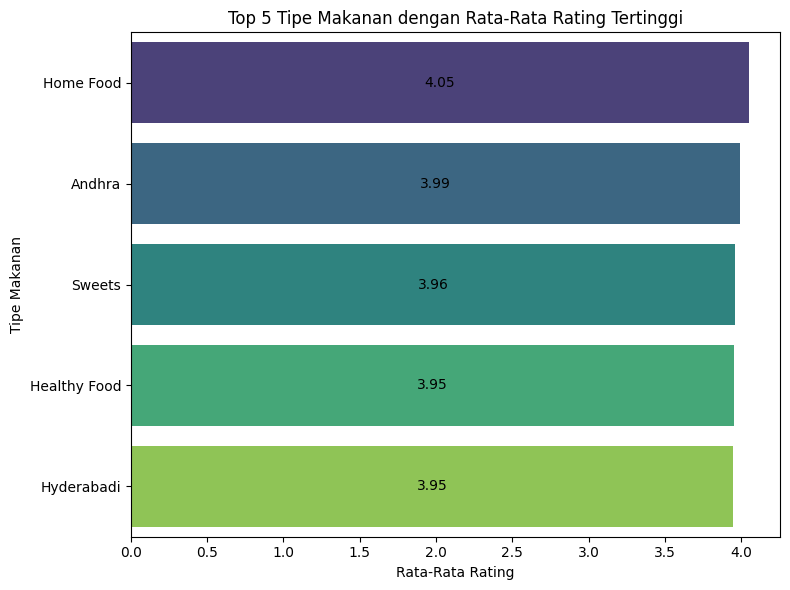

In [19]:
#mengambil data sesuai kebutuhan
top_5_rating_food_type = df_swiggy.groupby('Food type')['Avg ratings'].mean().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=top_5_rating_food_type, y='Food type', x='Avg ratings', hue='Food type', palette='viridis', legend=False)

# Tambahkan nilai rata-rata di dalam batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')

plt.title('Top 5 Tipe Makanan dengan Rata-Rata Rating Tertinggi')
plt.xlabel('Rata-Rata Rating')
plt.ylabel('Tipe Makanan')
plt.tight_layout()
plt.show()

Berdasarkan chart di atas bisa dilihat bahwa Home Food menjadi produk dengan rating ter tinggi, tapi untuk menentukan apakah itu adalah jenis makanan yang paling baik untuk dijual? kita harus menganalisanya lebih dalam lagi karena dalam diagram diatas rating masih di dapatkan dari rata-rata yang berarti jumlah restoran harus kita ketahui terlebih dahulu kemudian kita bisa menggunakan analisa yang lebih objektif

### Menganalisa berapa jumlah restoran yang pada top 5 rating tipe makanan

,Food type,Rata-Rata Rating,Count
0,Home Food,4.051220,82
1,Andhra,3.988406,69
2,Sweets,3.960535,299
3,Healthy Food,3.950204,245
4,Hyderabadi,3.947917,96


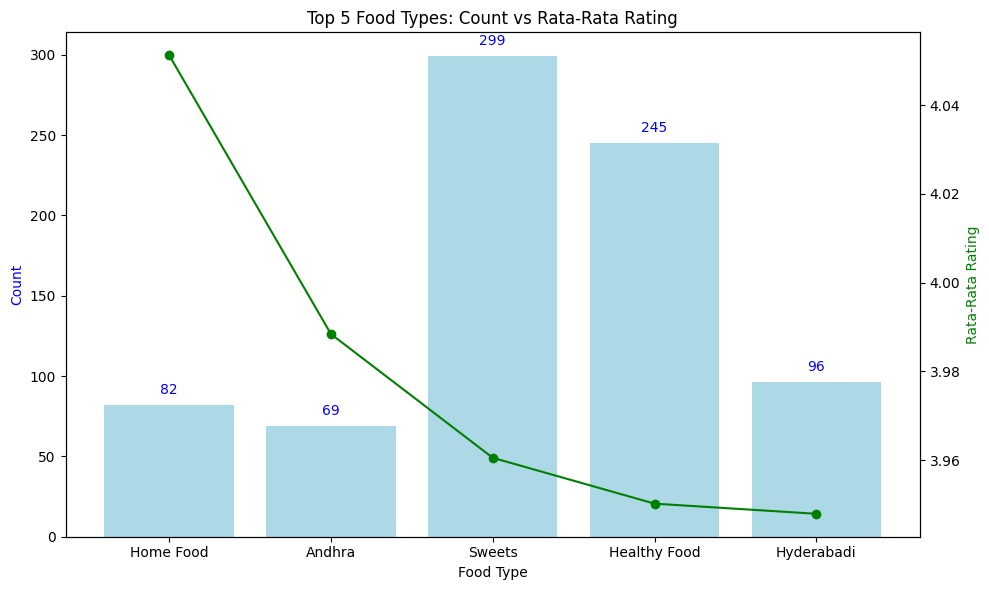

In [20]:
# mengambil data yang dibutuhkan
top_5_rating_food_type = (
    df_swiggy.groupby('Food type')
    .agg({'Avg ratings': 'mean', 'Food type': 'count'})
    .rename(columns={'Avg ratings': 'Rata-Rata Rating', 'Food type': 'Count'})
    .sort_values(by='Rata-Rata Rating', ascending=False)
    .head(5)
    .reset_index()
)

display(top_5_rating_food_type)

# Membuat chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart - Count
bars = ax1.bar(
    top_5_rating_food_type['Food type'],
    top_5_rating_food_type['Count'],
    color='lightblue',
    label='Count'
)

# Menambahkan label di atas bar
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height + 5,  # Jarak di atas bar
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='blue'
    )

# Line chart - Rata-Rata Rating
ax2 = ax1.twinx()
ax2.plot(
    top_5_rating_food_type['Food type'],
    top_5_rating_food_type['Rata-Rata Rating'],
    color='green',
    marker='o',
    label='Rata-Rata Rating'
)

# Label dan tampilan
ax1.set_xlabel('Food Type')
ax1.set_ylabel('Count', color='blue')
ax2.set_ylabel('Rata-Rata Rating', color='green')
plt.title('Top 5 Food Types: Count vs Rata-Rata Rating')
plt.tight_layout()
plt.show()


bisa dilihat ternyata tipe makanan home food walaupun dia memiliki rating yang tinggi akan tetapi jumlah restoran tipe makanan home food masih rendah yaitu 82 jadi kita tidak bisa menyimpulkan bahwa Home Food adalah jenis makan terbaik maka agar bisa lebih objektif dalam mengambil keputusan kita harus menggunakan skoring gabungan antara rata rata rating jumlah total rating dibagi dengan jumlah restoranya

### Menggunakan skor performa gabungan  untuk menganalisa agar lebih objektif

,Jumlah Restoran,Avg ratings,Total ratings,Skor
Food type,,,,
Kebabs,250,3.804000,117670,1790.466720
Tandoor,468,3.693376,162010,1278.555250
Mughlai,469,3.776972,150370,1210.966571
Andhra,69,3.988406,18550,1072.245327
Grill,51,3.829412,14070,1056.467128


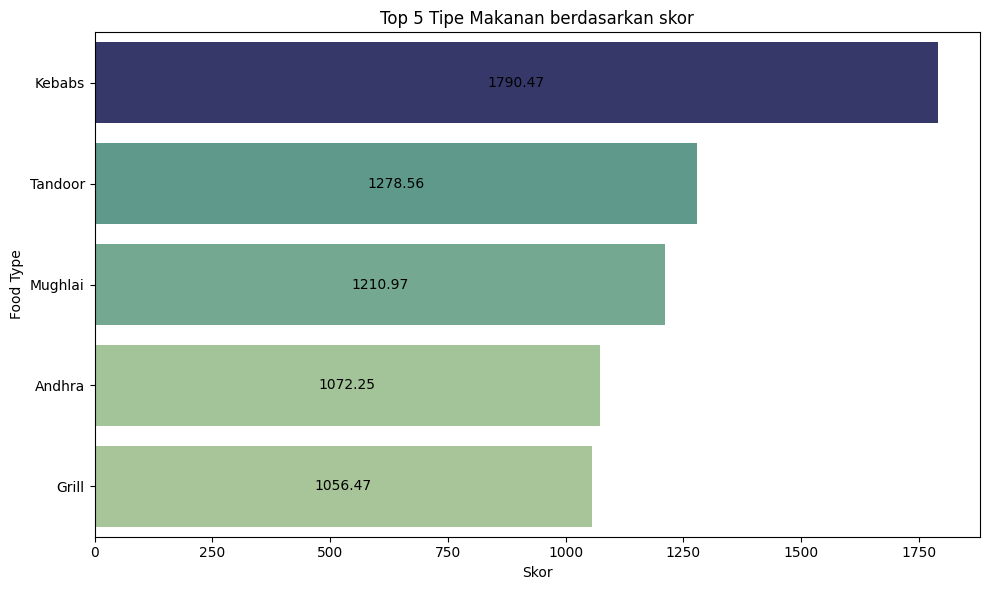

In [21]:
# mengambil data yang dibutuhkan
foodtype_stats = df_swiggy.groupby('Food type').agg({
    'ID': 'count',                    # jumlah restoran
    'Avg ratings': 'mean',            # rata-rata rating
    'Total ratings': 'sum'            # total rating (indikasi banyaknya transaksi)
}).rename(columns={'ID': 'Jumlah Restoran'})

# rumus skor gabungan 
foodtype_stats['Skor'] = (foodtype_stats['Avg ratings'] * foodtype_stats['Total ratings']) / foodtype_stats['Jumlah Restoran']

top_5_skor = foodtype_stats.sort_values(by='Skor', ascending=False).head(5)
display(top_5_skor)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_5_skor,
    x='Skor',
    hue='Skor',
    y=top_5_skor.index, 
    palette='crest',  
    legend=False
)
# Tambahkan nilai rata-rata di dalam batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')

plt.title('Top 5 Tipe Makanan berdasarkan skor')
plt.xlabel('Skor')
plt.ylabel('Food Type')
plt.tight_layout()
plt.show()



dengan melakukan analisa ulang menggunakan skoring maka didapat kan bahwa kebab merupakan produk paling populer di aplikasi swiggy dengan perolehan skor **1790.47**, memiliki selisih yang jauh terhadap yang lainya, walaupun secara skor kurang baik karena memiliki poin **3.8** akan tetapi peminat kebab sangat banyak sekali

## 2. Menghitung Rata-Rata Harga Tipe Makanan Kebab Dari Setiap Kota

dari hasil analisa pertama kebab menjadi tipe makanan terpopuler di aplikasi swiggy

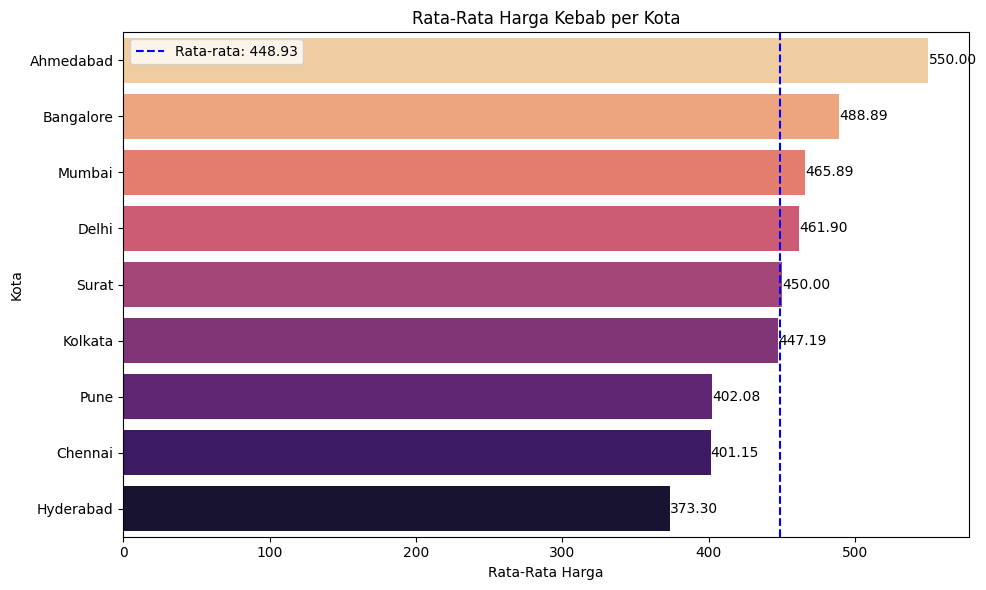

In [22]:
# mengambil data yang diperlukan
mean_harga = (
    df_swiggy[df_swiggy['Food type'] == 'Kebabs']
    .groupby(['City', 'Food type'])
    .agg({
        'Price': 'mean',
        'ID': 'count'  # atau kolom yang mewakili restoran unik
    })
    .rename(columns={
        'Price': 'Rata-Rata Harga',
        'ID': 'Restaurant Count'
    })
    .sort_values(by='Rata-Rata Harga', ascending=False)
    .reset_index()
)

# Hitung rata-rata dari seluruh harga
mean_price = mean_harga['Rata-Rata Harga'].mean()

# Urutkan data dari harga kecil ke besar
data_sorted = mean_harga.sort_values(by='Rata-Rata Harga', ascending=False)

# Buat plot ukuran tertentu
plt.figure(figsize=(10, 6))

# Buat horizontal bar chart dengan seaborn
barplot = sns.barplot(
    data=data_sorted,
    x='Rata-Rata Harga',
    y='City',
    palette='magma_r',
    hue='City',
    legend=False
)

# Tambahkan label angka di ujung tiap bar
for index, row in data_sorted.iterrows():
    plt.text(
        row['Rata-Rata Harga'] + 0.1,  # X: geser sedikit ke kanan dari ujung bar
        index,  # Y: posisi berdasarkan index bar ke berapa
        f'{row["Rata-Rata Harga"]:.2f}',  # Format angka
        va='center'
    )

# Tambahkan garis vertikal rata-rata
plt.axvline(
    x=mean_price,
    color='blue',
    linestyle='--',
    label=f'Rata-rata: {mean_price:.2f}'
)

# Judul dan label
plt.title('Rata-Rata Harga Kebab per Kota')
plt.xlabel('Rata-Rata Harga')
plt.ylabel('Kota')

# Tambahkan legend
plt.legend(loc='upper left')

# Rapikan layout dan tampilkan
plt.tight_layout()
plt.show()

Dalam visualisasi yang menampilkan rata-rata harga kebab per kota, kita dapat melihat adanya variasi harga yang cukup mencolok antara kota satu dengan yang lainnya. Grafik ini secara eksplisit menunjukkan bahwa Ahmedabad berada di posisi puncak sebagai kota dengan rata-rata harga kebab tertinggi di antara seluruh kota yang dianalisis, dengan nilai yang jelas melebihi garis rata-rata keseluruhan yaitu **448.93**. Hal ini mengindikasikan bahwa konsumen di Ahmedabad cenderung membayar lebih mahal untuk seporsi kebab, yang bisa mencerminkan beberapa kemungkinan, seperti preferensi terhadap kualitas premium, harga pasar yang memang lebih tinggi, atau bahkan tingginya daya beli konsumen di kota tersebut.

Dari warna batang dan gradasi yang digunakan yang semakin terang menandakan harga lebih tinggi kita dapat pula menyimpulkan bahwa kota dengan harga premium lebih menonjol secara visual. Visualisasi ini tidak hanya memberikan gambaran angka semata, tetapi juga memperlihatkan konteks harga dalam lanskap geografis dan ekonomi yang lebih luas.

## 3. Top 5 kota dengan rating tertinggi

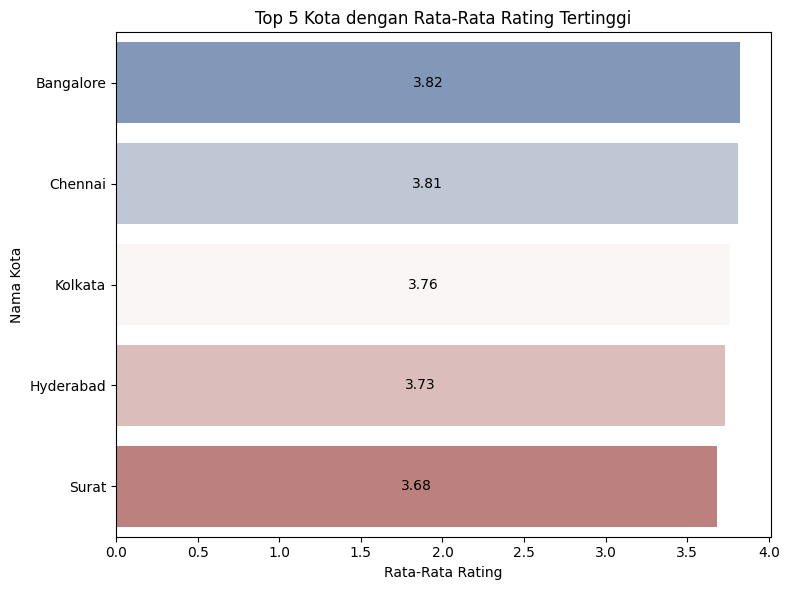

In [23]:
top_5_rating_city = df_swiggy.groupby('City')['Avg ratings'].mean().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=top_5_rating_city, y='City', x='Avg ratings', hue='City', palette='vlag', legend=False)

# Tambahkan nilai rata-rata di dalam batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')

plt.title('Top 5 Kota dengan Rata-Rata Rating Tertinggi')
plt.xlabel('Rata-Rata Rating')
plt.ylabel('Nama Kota')
plt.tight_layout()
plt.show()

sama halnya dengan mencari tipe makanan favorit kita harus mencari jumlah restoranya terlebih dahulu sebelum menarik kesimpulan. meskipun bangalore memiliki rata-rata rating tertinggi belum bisa di pastikan hanya dengan itu saja, kita harus menganalisanya lebih dalam lagi agar analisa yang lebih objektif



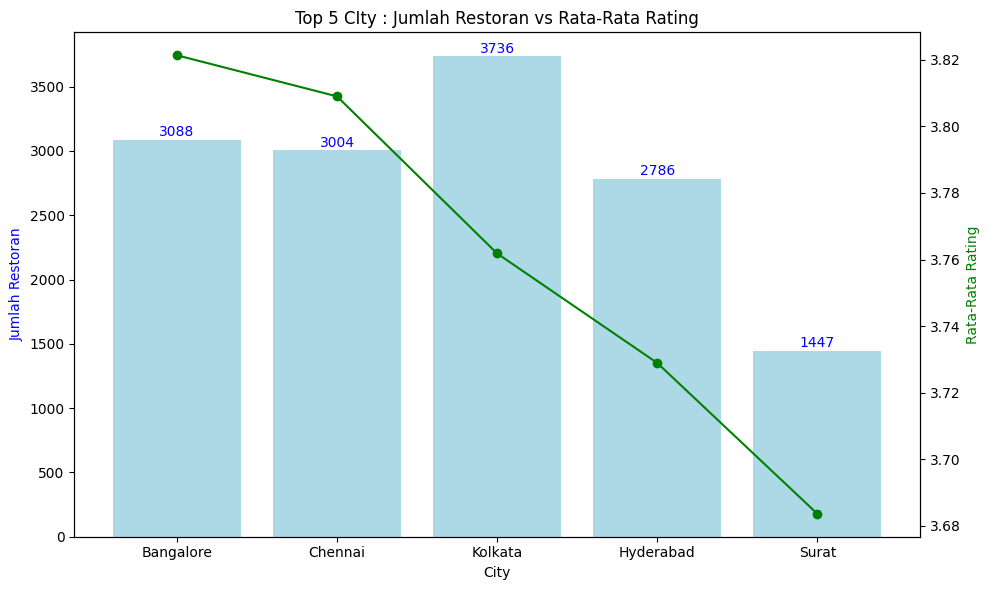

In [24]:
# mengambil data yang diperlukan
top_5_rating_city = (
    df_swiggy.groupby('City')
    .agg({'Avg ratings': 'mean', 'ID': 'count'})
    .rename(columns={'Avg ratings': 'Mean Rating', 'ID': 'Jumlah Restoran'})
    .sort_values(by='Mean Rating', ascending=False)
    .head(5)
    .reset_index()
)


# Membuat chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart - Count
bars = ax1.bar(
    top_5_rating_city['City'],
    top_5_rating_city['Jumlah Restoran'],
    color='lightblue',
    label='Jumlah Restoran'
)

# Menambahkan label di atas bar
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height + 5,  # Jarak di atas bar
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='blue'
    )

# Line chart - Rata-Rata Rating
ax2 = ax1.twinx()
ax2.plot(
    top_5_rating_city['City'],
    top_5_rating_city['Mean Rating'],
    color='green',
    marker='o',
    label='Rata-Rata Rating'
)

# Label dan tampilan
ax1.set_xlabel('City')
ax1.set_ylabel('Jumlah Restoran', color='blue')
ax2.set_ylabel('Rata-Rata Rating', color='green')
plt.title('Top 5 CIty : Jumlah Restoran vs Rata-Rata Rating')
plt.tight_layout()
plt.show()


masih ada ketidakseimbangan antara rating dan juga jumlah rating walau hanya berbeda sedikit akan lebih akurat lagi jadi kita menggunakan skoring untuk menganalisa kota agar lebih objektif

,Jumlah Restoran,Avg ratings,Total ratings,Skor
City,,,,
Hyderabad,2786,3.728930,1179110,1578.183447
Chennai,3004,3.809021,603580,765.329254
Kolkata,3736,3.761831,657540,662.086255
Bangalore,3088,3.821373,524950,649.621045
Surat,1447,3.683621,224390,571.228597


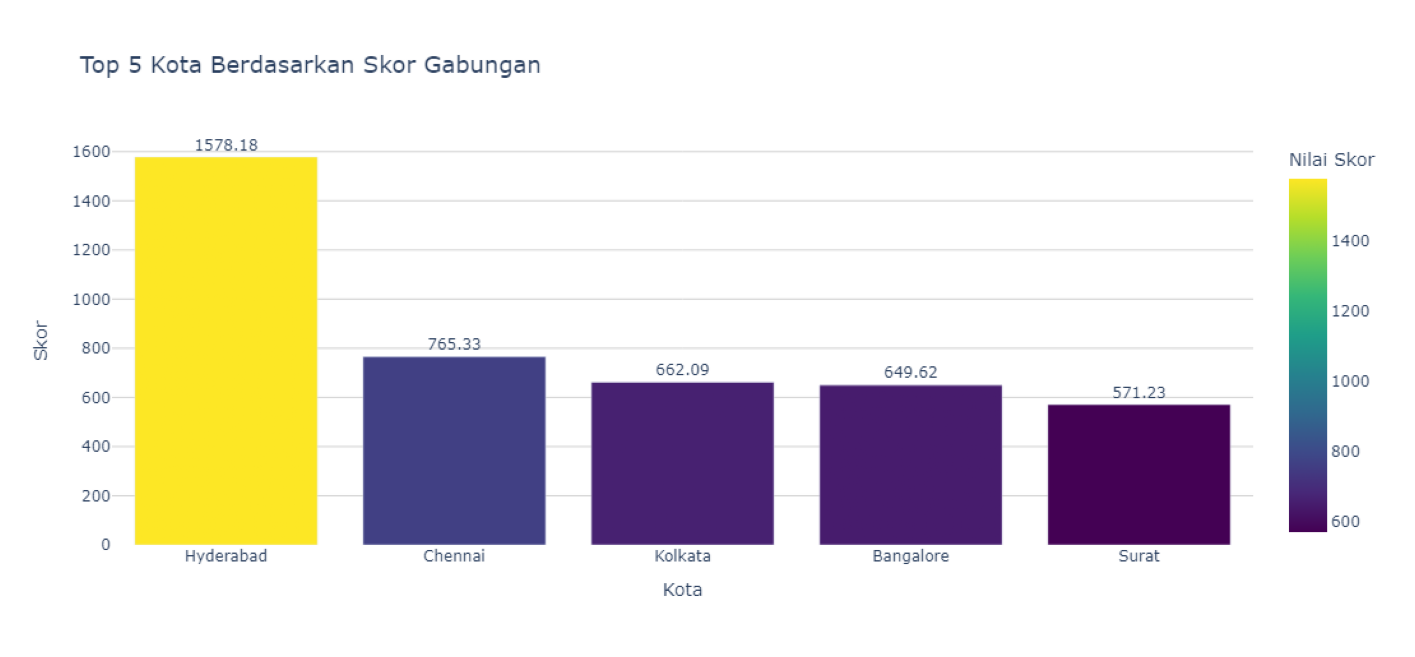

In [25]:
# mengambil data yang diperlukan
city_stats = df_swiggy.groupby('City').agg({
    'ID': 'count',                     # jumlah restoran
    'Avg ratings': 'mean',            # rata-rata rating
    'Total ratings': 'sum'            # total rating (indikasi banyaknya transaksi)
}).rename(columns={'ID': 'Jumlah Restoran'})

# membuat skoring gabungan
city_stats['Skor'] = (city_stats['Avg ratings'] * city_stats['Total ratings']) / city_stats['Jumlah Restoran']

city_top_5_skor = city_stats.sort_values(by='Skor', ascending=False).head(5)
display(city_top_5_skor)

fig = px.bar(
    city_top_5_skor.sort_values(by='Skor', ascending=False).reset_index(),
    x='City',
    y='Skor',
    color='Skor',
    color_continuous_scale='viridis',
    title='Top 5 Kota Berdasarkan Skor Gabungan',
    labels={'Skor': 'Nilai Skor', 'City': 'Kota'}
)

fig.update_traces(
    texttemplate='%{y:.2f}',
    textposition='outside'
)

fig.update_layout(
    xaxis_title='Kota',
    yaxis_title='Skor',
    plot_bgcolor='white',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(gridcolor='lightgrey'),
    title_font_size=18,
    height=500
)

fig.show()

img = mpimg.imread('Top5_Kota_By_Skor.png')
plt.figure(figsize=(18, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

Berdasarkan perhitungan skor gabungan yang mengombinasikan tiga indikator utama yaitu jumlah restoran, rata-rata rating, dan total jumlah rating terlihat dengan sangat jelas bahwa Hyderabad secara signifikan lebih baik dibandingkan kota-kota lainnya. Kota ini mencatat nilai skor tertinggi sebesar **1578.18**, yang hampir dua kali lipat dari kota peringkat kedua, Chennai, yang hanya mencatat skor sebesar **765.33**.

Dominasi kota Hyderabad dalam chart ini mengindikasikan bahwa kota tersebut bukan hanya memiliki restoran dengan pelanggan yang banyak, akan tetapi juga berhasil menjaga kualitas layanan atau produk mereka, sebagaimana tercermin dari rata-rata rating yang cukup baik. Dengan kata lain, Hyderabad adalah kota yang sangat direkomendasikan karena ideal secara kuantitas dan kualitas berdasarkan aplikasi swiggy, khususnya untuk layanan seperti Swiggy.

## 4. bagaimana sebaran mitra swiggy berdasarkan areanya dari kota yang paling tinggi ratingnya

pada analisa tahap ini kita akan menentukan 5 area yang paling banyak menggunakan aplikasi swiggy

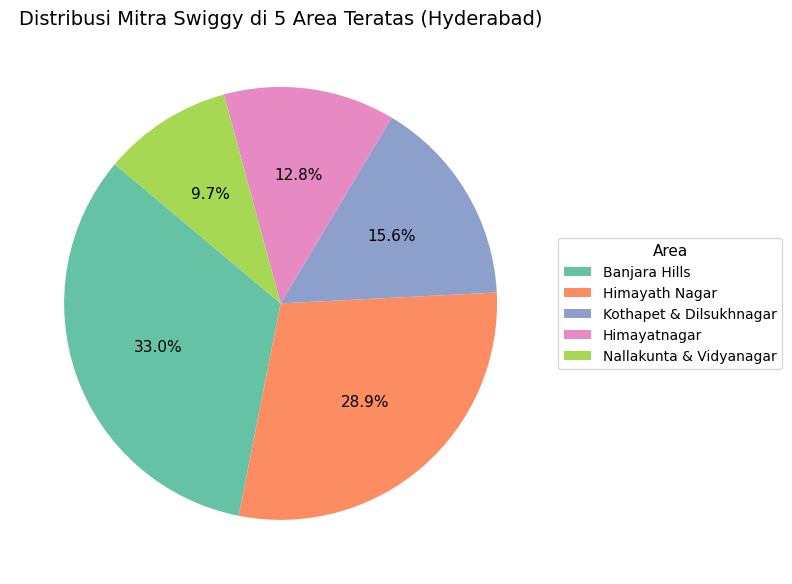

In [26]:
area_counts = df_swiggy[df_swiggy['City'] == 'Hyderabad'].groupby('Area')['ID'].count().reset_index(name='Jumlah Mitra')
top5_areas = area_counts.sort_values(by='Jumlah Mitra',ascending=False).head(5)

# Ambil top 5 area berdasarkan jumlah mitra
top5_areas = area_counts.sort_values(by='Jumlah Mitra', ascending=False).head(5)

# Data
labels = top5_areas['Area']
sizes = top5_areas['Jumlah Mitra']
colors = sns.color_palette('Set2', n_colors=5)  # Lebih cerah & beda-beda warna

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11}
)

# Tambahkan legend di samping
plt.legend(
    wedges,
    labels,
    title='Area',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=11
)

# Tambahkan judul
plt.title('Distribusi Mitra Swiggy di 5 Area Teratas (Hyderabad)', fontsize=14)

# Rapikan layout
plt.tight_layout()
plt.show()

pada pie chart ini kita bisa mengekstraksi banyak informasi strategis. Ia bukan hanya menunjukkan angka-angka, tapi mencerminkan realitas bisnis Swiggy di lapangan bagaimana kemitraan terdistribusi, di mana kekuatan dominan berada, serta di mana ada ruang untuk pertumbuhan dan ekspansi. Diagram ini juga mencerminkan kemungkinan adanya konsentrasi layanan yang sangat tinggi di area tertentu, yang bisa berdampak pada persaingan antar mitra, kualitas layanan, hingga pengalaman pelanggan akhir.

Irisan terbesar dari pie chart ini jatuh pada Banjara Hills sebesar **33%**. Area ini menyumbang sepertiga dari total mitra di antara lima area yang ditampilkan. Ini mengindikasikan bahwa Banjara Hills adalah wilayah dengan konsentrasi kemitraan yang sangat tinggi. Bisa diasumsikan bahwa wilayah ini adalah pusat aktivitas ekonomi, kawasan premium, atau daerah dengan demand kuliner yang sangat besar.

dan untuk irisan terkecil dalam chart ini adalah nallakunta & Vidyanagar, yakni kurang dari **10%**. Meskipun kecil, fakta bahwa area ini masuk ke dalam lima besar menunjukkan bahwa masih terdapat peluang pasar yang berkembang, khususnya jika dibandingkan dengan banyak area lain yang tidak masuk ke dalam chart.

## 5. Menganalisa area yang minat jualnya tinggi akan tetapi masih sedikit kompetitornya

berdasarkan analisa sebelumnya telah didapatkan produk dan kota yang paling populer sehingga kita akan memfilter datanya berdasarkan hasil tersebut

In [27]:
# mengambil data yang dibutuhkan
kompetitor_area = (
    df_swiggy[(df_swiggy['Food type'] == 'Kebabs')&(df_swiggy['City'] == 'Hyderabad')]
    .groupby(['Area', 'Food type'])
    .agg({
        'Avg ratings' : 'mean',
        'Total ratings': 'sum',
        'ID': 'count'
    })
    .rename(columns={
        'Avg ratings' : 'Rating',
        'ID': 'Jumlah Restaurant',
        'Total ratings': 'Jumlah Rating'
    })
    .sort_values(by='Jumlah Rating', ascending=False)
    .reset_index()
)
area_kebab = kompetitor_area.drop_duplicates(subset='Area').head(5)


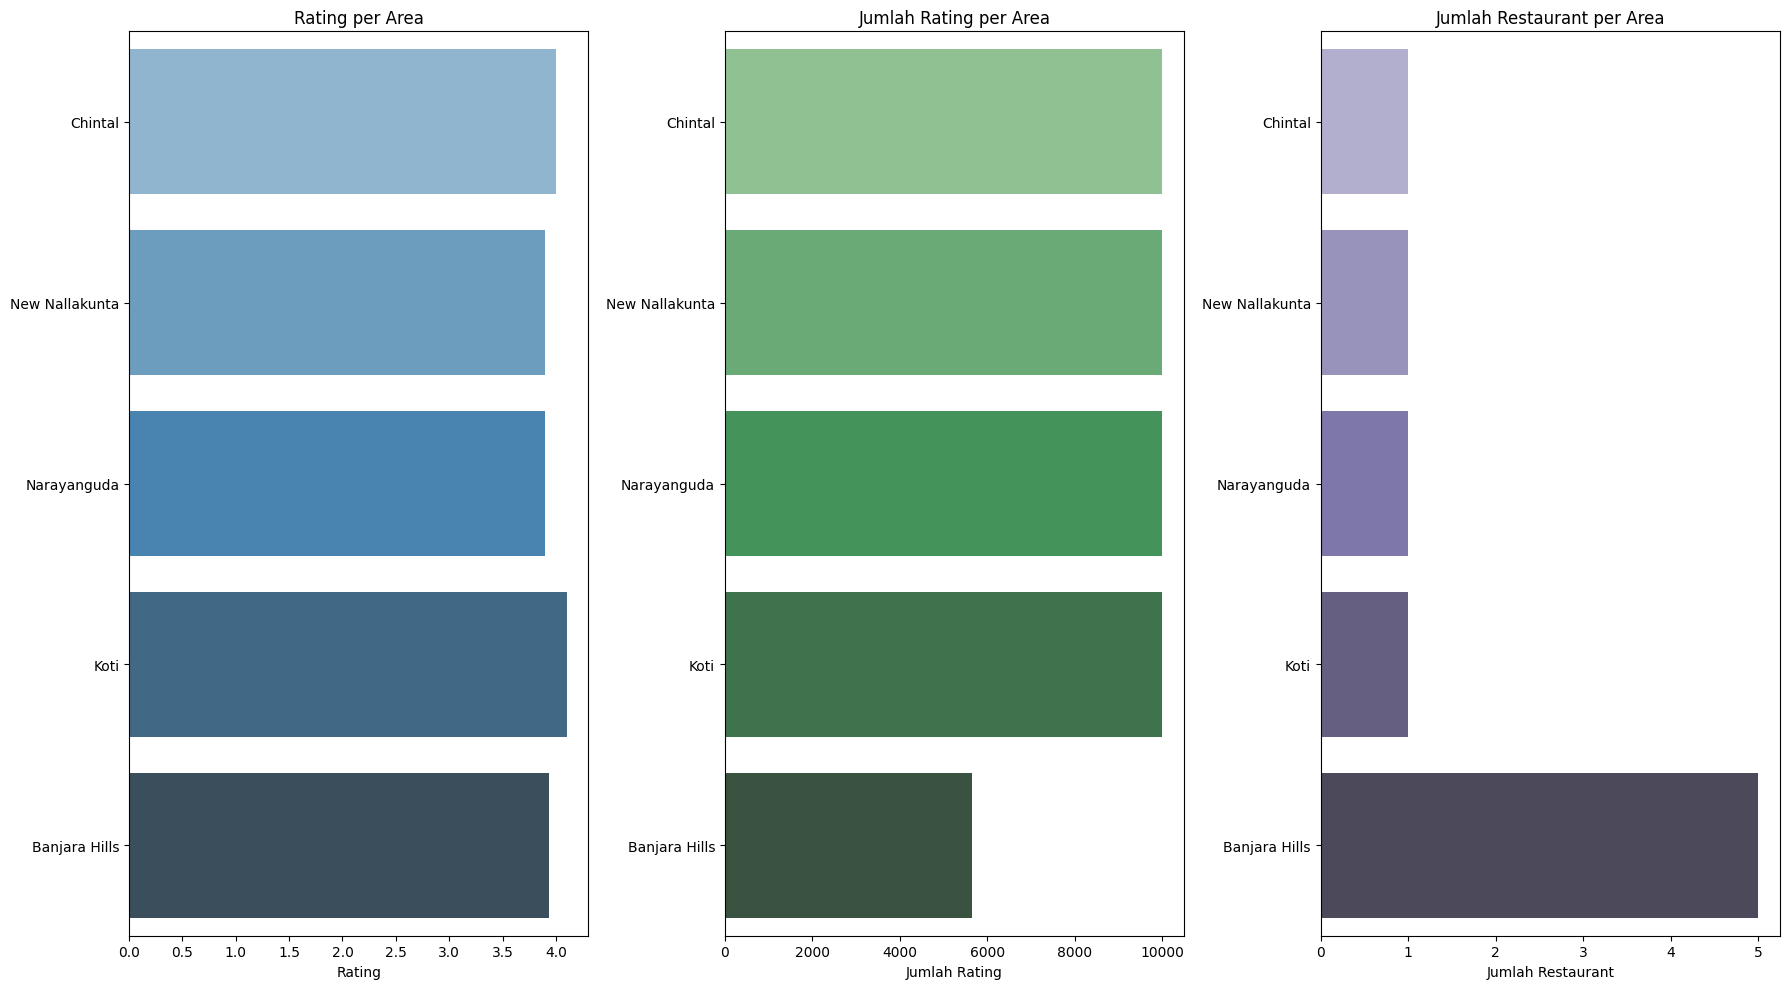

In [28]:
# Set ukuran figure
plt.figure(figsize=(18, 10))

# Chart 1: Area vs Rating
plt.subplot(1, 3, 1)
sns.barplot(data=area_kebab, y='Area', x='Rating',hue='Area', palette='Blues_d', legend=False)
plt.title('Rating per Area')
plt.xlabel('Rating')
plt.ylabel('')

# Chart 2: Area vs Jumlah Rating
plt.subplot(1, 3, 2)
sns.barplot(data=area_kebab, y='Area', x='Jumlah Rating',hue='Area', palette='Greens_d', legend=False)
plt.title('Jumlah Rating per Area')
plt.xlabel('Jumlah Rating')
plt.ylabel('')

# Chart 3: Area vs Jumlah Restaurant
plt.subplot(1, 3, 3)
sns.barplot(data=area_kebab, y='Area', x='Jumlah Restaurant',hue='Area', palette='Purples_d', legend=False)
plt.title('Jumlah Restaurant per Area')
plt.xlabel('Jumlah Restaurant')
plt.ylabel('')

plt.tight_layout()
plt.show()

berdasarkan chart di atas bisa dilihat area area yang bisa menjadi keputusan untuk membuka resto, dalam case ini ada 4 kota yang memiliki jumlah rating paling banyak yaitu narayanggudha, chintal, kota, dan new nallakunta. tapi untuk mengambil keputusan dimana kita akan buka di 4 kota itu kita dapat melihat dari ratingnya sehingga membuat new nallakunta dan narayanguda menjadi kompetitor yang mudah karena ratingnya rendah sedangkan peminat kebab disana banyak dan restoranya masih hanya ada 1 saja disana

## 6. Menganalisa apakah terdapat korelasi antara rating terhadap waktu pengiriman 

karena kita ingin membuat resto dengan rating yang tinggi kita harus mencari korelasi terhadap beberapa faktor salah satunya korelasi antara rating dengan waktu pengiriman yang akan kita analisa pertama

### Menggunakan Confidence Interval 95 % Untuk Mencari Nilai Minimum dan Maksimum waktu pengiriman

In [29]:
skew = df_swiggy['Delivery time'].skew()
print(f'Nilai Skewness dari Waktu Pengiriman : {skew}')

Nilai Skewness dari Waktu Pengiriman : 0.39319136731644677


berdasarkan data skew hanya menghasilkan nilai (0.39319136731644677) hanya condong ke kanan sedikit sehingga data masih tergolong normal

### Menggunakan z-score untuk mengatasi outlier dengan data normal

In [30]:
avg = df_swiggy['Delivery time'].mean()
std = df_swiggy['Delivery time'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper : {up_bound:.2f}' )
print(f'Lower : {low_bound:.2f}')

outlier = df_swiggy['Delivery time'][(df_swiggy['Delivery time']<low_bound) | (df_swiggy['Delivery time']>up_bound)]

print(f'Presentase dari outliers: {len(outlier)*100/len(df_swiggy['Delivery time']):.2f}%%')

# membuat dataframe baru dengan data tanpa outlier
df_swiggy_no_outlier = df_swiggy[(df_swiggy['Delivery time']>=low_bound) & (df_swiggy['Delivery time']<=up_bound)]

Upper : 95.96
Lower : 11.44
Presentase dari outliers: 0.11%%


- Upper: 95.96 → Batas atas dari nilai normal (di atas ini dianggap outlier).

- Lower: 11.44 → Batas bawah dari nilai normal (di bawah ini dianggap outlier).

- Persentase outlier: 0.11% → Hanya 0.11% data yang berada di luar batas normal, jadi hampir semua data berada dalam rentang yang wajar.

Artinya, data sangat bersih dan minim anomali. Jadi Data memiliki distribusi yang normal dan stabil, dengan hanya 0.11% outlier, sehingga dapat dipercaya untuk analisis dan pengambilan keputusan.

menghapus data outlier yang menggunakan zscore dengan presentase outlier 0.11%

### Menggunakan Pearson untuk menguji korelasi

karena data terdistribusi normal kita bisa menggunakan korelasi pearson

In [31]:
corr_rho, pval_s = stats.pearsonr(df_swiggy_no_outlier['Delivery time'], df_swiggy_no_outlier['Avg ratings'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}\n")

# Interpretasi
if pval_s < 0.05:
    print("H1 diterima : Ada hubungan signifikan antara waktu pengiriman dan Rating.\n")
    if corr_rho < 0:
        print("Korelasi negatif: semakin lambat waktu pengiriman, rating semakin turun.\n")
    else:
        print("Korelasi positif: semakin cepat waktu pengiriman, rating semakin naik.\n")
else:
    print("H0 diterima : Tidak ada hubungan signifikan antara waktu pengiriman dan Rating.\n")

rho-correlation: -0.13, p-value: 3.217785698304979e-96

H1 diterima : Ada hubungan signifikan antara waktu pengiriman dan Rating.

Korelasi negatif: semakin lambat waktu pengiriman, rating semakin turun.



Terdapat hubungan yang signifikan antara waktu pengiriman dan rating (ρ = -0.13, p < 0.001). Arah korelasi yang negatif mengindikasikan bahwa semakin lama waktu pengiriman, semakin rendah rating yang diberikan oleh pelanggan. Meskipun kekuatannya tergolong lemah, hubungan ini tetap berarti secara statistik.

### Scatter plot untuk memvisualisasikan analisa korelasi

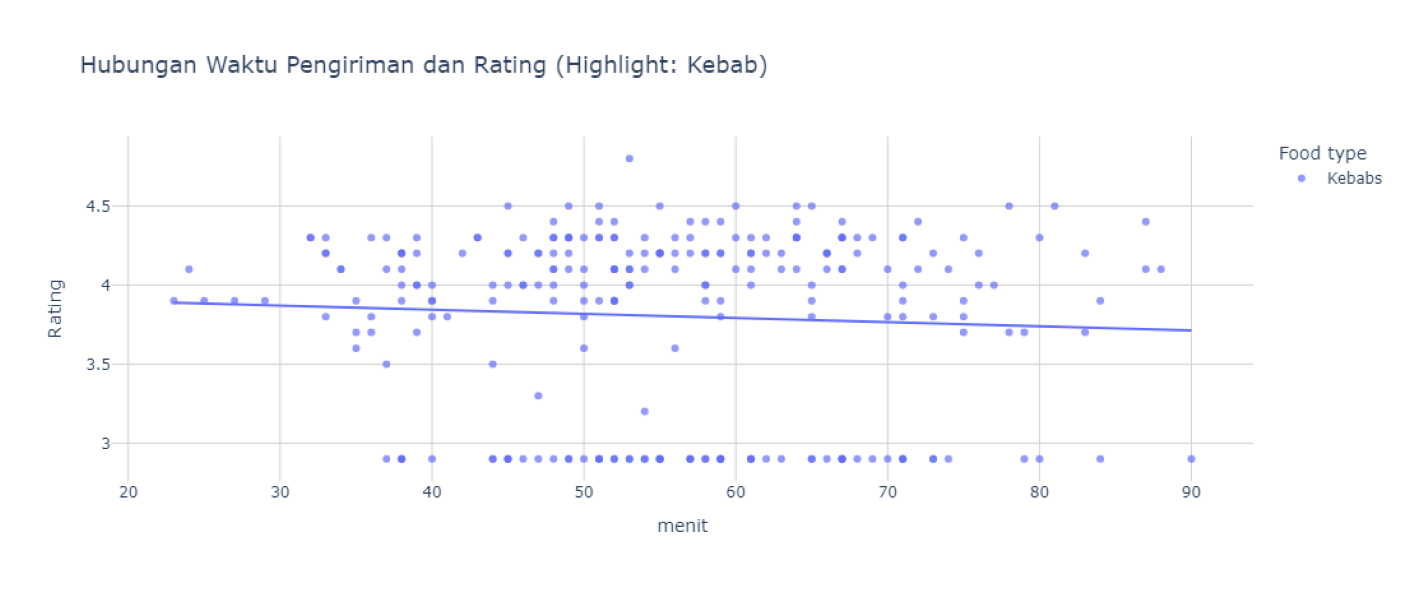

In [32]:
# Tambahkan kolom bantu agar semua dianggap Kebab
df_vis = df_swiggy_no_outlier[df_swiggy_no_outlier['Food type'] == 'Kebabs']

# Plot scatter chart
fig = px.scatter(
    df_vis,
    x='Delivery time',
    y='Avg ratings',
    color='Food type',  # hanya satu kategori: Kebab
    hover_data=['City', 'Restaurant', 'Food type'],
    trendline='ols',
    title='Hubungan Waktu Pengiriman dan Rating (Highlight: Kebab)',
    labels={
        'Delivery time': 'menit',
        'Avg ratings': 'Rating',
        'Food Category': 'Tipe Makanan'  # Nama di legend
    },
    opacity=0.7
)

fig.update_layout(
    title_font_size=18,
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray')
)

fig.show()

img = mpimg.imread('waktupengiriman_dan_rating.png')
plt.figure(figsize=(18, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

Chart di atas menunjukkan hubungan antara waktu pengiriman (dalam menit) dan rating pelanggan pada semua tipe makanan, namun secara visual hanya ditandai sebagai satu kategori yaitu "Kebab" (untuk menyoroti fokus analisis).

Dari scatter plot tersebut, dapat dilihat bahwa mayoritas rating berkisar antara 3 hingga 5, dengan distribusi titik yang cukup padat di waktu pengiriman sekitar 30 hingga 60 menit. Terdapat garis tren regresi dengan kemiringan negatif, yang mengindikasikan adanya korelasi negatif lemah antara waktu pengiriman dan rating. Artinya, semakin lama waktu pengiriman, rating cenderung menurun, walaupun penurunannya tidak drastis.

Kesimpulannya, meskipun pengaruhnya kecil, kecepatan pengiriman tetap memiliki dampak yang signifikan secara statistik terhadap kepuasan pelanggan. Maka, menjaga efisiensi waktu pengantaran tetap penting untuk mempertahankan rating tinggi, terutama dalam konteks makanan seperti kebab.

## 7. Menganalisa apakah terdapat korelasi antara rating terhadap harga

untuk uji korelasi kedua kita akan mencari tau apakah rating ada hubunganya dengan harga, karena ini sangat berpengaruhdalam penentuan harga nantinya agar lebih objektif dan sesuai dengan target

### Menggunakan Confidence Interval 95 % Untuk Mencari Nilai Minimum dan Maksimum Harga

In [33]:
skew = df_swiggy['Price'].skew()
print(f'Nilai Skewness dari Harga : {skew}')

Nilai Skewness dari Harga : 2.4115709322118404


berdasarkan data skew hanya menghasilkan nilai (2.411) lumayan condong ke kanan sedikit sehingga data masih tergolong normal

untuk benchmark harga relative tidak jauh yang menandakan bahwa data Harga normal mendekati sempurna

### Menggunakan z-score untuk mengatasi outlier dengan data normal

In [34]:
avg = df_swiggy['Price'].mean()
std = df_swiggy['Price'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper : {up_bound:.2f}' )
print(f'Lower : {low_bound:.2f}')

outlier = df_swiggy['Price'][(df_swiggy['Price']<low_bound) | (df_swiggy['Price']>up_bound)]

print(f'Presentase dari outliers: {len(outlier)*100/len(df_swiggy['Price']):.2f}%%')

# membuat dataframe baru dengan data tanpa outlier
df_swiggy_no_outlier = df_swiggy[(df_swiggy['Price']>=low_bound) & (df_swiggy['Price']<=up_bound)]

Upper : 1071.46
Lower : -344.59
Presentase dari outliers: 2.45%%


- Upper: 1071.46 → Batas atas dari nilai normal (di atas ini dianggap outlier).

- Lower: -344.59 → Batas bawah dari nilai normal (di bawah ini dianggap outlier).

- Persentase outlier: 2.45% → Hanya 2.45% data yang berada di luar batas normal, jadi hampir semua data berada dalam rentang yang wajar.

Artinya, data sangat bersih dan minim anomali. Jadi Data memiliki distribusi yang normal dan stabil, dengan hanya 0.11% outlier, sehingga dapat dipercaya untuk analisis dan pengambilan keputusan.

### Menggunakan Pearson untuk menguji korelasi

In [35]:
corr_rho, pval_s = stats.pearsonr(df_swiggy_no_outlier['Price'], df_swiggy_no_outlier['Avg ratings'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}\n")

# Interpretasi
if pval_s < 0.05:
    print("H1 diterima : Ada hubungan signifikan antara Harga dan Rating.\n")
    if corr_rho < 0:
        print("Korelasi negatif: semakin turun Harga, rating semakin turun.\n")
    else:
        print("Korelasi positif: semakin tinggi harga, rating semakin naik.\n")
else:
    print("H0 diterima : Tidak ada hubungan signifikan antara harga dan Rating.\n")

rho-correlation: 0.13, p-value: 1.9479837062999636e-92

H1 diterima : Ada hubungan signifikan antara Harga dan Rating.

Korelasi positif: semakin tinggi harga, rating semakin naik.



Berdasarkan hasil analisis, diperoleh nilai korelasi Pearson sebesar 0.13 dengan p-value yang sangat kecil (p < 0.001), yang menunjukkan bahwa terdapat hubungan signifikan antara harga dan rating. Meskipun kekuatan korelasinya lemah, arah korelasi yang positif mengindikasikan bahwa semakin tinggi harga suatu makanan, cenderung semakin tinggi pula rating yang diberikan oleh pelanggan. Ini bisa mengarah pada persepsi bahwa makanan dengan harga lebih tinggi dianggap lebih berkualitas.

### Scatter plot untuk memvisualisasikan analisa korelasi

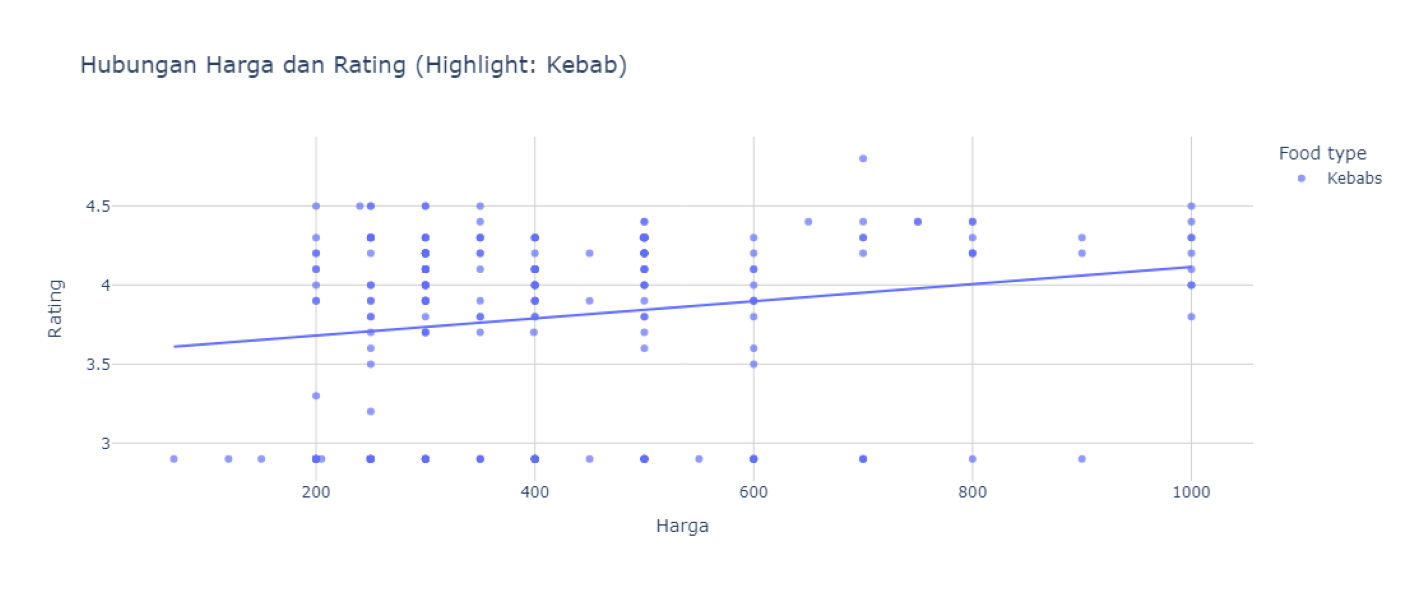

In [36]:
# Tambahkan kolom bantu agar semua dianggap Kebab
df_vis = df_swiggy_no_outlier[df_swiggy_no_outlier['Food type'] == 'Kebabs']

# Plot scatter chart
fig = px.scatter(
    df_vis,
    x='Price',
    y='Avg ratings',
    color='Food type',  # hanya satu kategori: Kebab
    hover_data=['City', 'Restaurant', 'Food type'],
    trendline='ols',
    title='Hubungan Harga dan Rating (Highlight: Kebab)',
    labels={
        'Price': 'Harga',
        'Avg ratings': 'Rating',
        'Food Category': 'Tipe Makanan'  # Nama di legend
    },
    opacity=0.7
)

fig.update_layout(
    title_font_size=18,
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray')
)

fig.show()
img = mpimg.imread('Harga_rating.png')
plt.figure(figsize=(18, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

Chart di atas menunjukkan hubungan antara harga makanan dan rating pelanggan, dengan fokus khusus pada kategori Kebab.

Dari scatter plot ini, dapat dilihat bahwa titik-titik tersebar di seluruh rentang harga, mulai dari sangat murah hingga mendekati 1000 rupee. Rating mayoritas berkisar antara 3 hingga 5, dengan konsentrasi tinggi di sekitar harga 100–400 rupee. Garis regresi linier yang terlihat memiliki kemiringan positif, yang mengindikasikan korelasi positif lemah antara harga dan rating.

Kesimpulannya, terdapat kecenderungan bahwa semakin mahal harga makanan kebab, semakin tinggi rating yang diberikan pelanggan. Meskipun hubungan ini tidak terlalu kuat, pola ini bisa menunjukkan bahwa pelanggan mungkin mengaitkan harga yang lebih tinggi dengan kualitas atau kepuasan yang lebih baik.

## 8. Apakah Tipe Makanan Memiliki Pengaruh Terhadap Rating

&emsp;ANOVA One-Way (Analisis Varians Satu Arah) digunakan ketika kita ingin membandingkan rata-rata dari satu variabel numerik (contohnya Avg ratings) antar beberapa kelompok kategori (contohnya Food type). Dalam kasus ini:

- Food type = variabel kategori (independen)

- Avg ratings = variabel numerik (dependen)

&emsp;ANOVA memeriksa apakah perbedaan rata-rata antar kelompok terlalu besar untuk dianggap terjadi secara kebetulan. Jika iya (ditunjukkan dengan p-value kecil), maka kita menyimpulkan bahwa kategori tersebut memang memengaruhi nilai rata-rata.

jadi kita akan membuat Hipotesis pada kasus ini terlebih dahulu 

**H0 : Tidak terdapat pengaruh signifikan antara tipe makanan terhadap rating**

**H1 : Terdapat pengaruh signifikan antara tipe makanan  terhadap rating**



In [37]:
# 1. Buat grup nilai berdasarkan Food Type
grup_rating = [
    group['Avg ratings'].dropna().values
    for name, group in df_swiggy.groupby('Food type')
]
# display(grup_rating)
# 2. Jalankan ANOVA
f_stat, p_value = f_oneway(*grup_rating)

# 3. Tampilkan hasil
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value    : {p_value:.4f}")

# 4. Interpretasi
if p_value < 0.05:
    print("Terdapat pengaruh signifikan antara Food type terhadap Avg ratings.")
else:
    print("Tidak terdapat pengaruh signifikan antara Food type terhadap Avg ratings.")

F-statistic: 15.7358
P-value    : 0.0000
Terdapat pengaruh signifikan antara Food type terhadap Avg ratings.


Berdasarkan hasil uji ANOVA one way, didapatkan nilai F-statistic sebesar 15.7358 dan nilai p-value 0.0000, yang jauh lebih kecil dari ambang signifikansi 0.05. Hal ini menunjukkan bahwa terdapat perbedaan yang signifikan dalam rata-rata rating antar berbagai jenis makanan (Food type). Dengan kata lain, jenis makanan memiliki pengaruh nyata terhadap penilaian (rating) pelanggan, sehingga preferensi konsumen dapat berbeda tergantung pada tipe makanan yang ditawarkan.

# Conclusion

&emsp;&emsp;analisa ini bertujuan untuk mencari  produk apa yang cocok untuk dijual pada aplikasi swiggy beserta harga yang cocok, serta mencari kota mana yang paling cocok kemudian kita cari area mana yang masih memiliki sedikit komptetitor tapi tergolong area yang masih menjadi area produktif. Analisis ini dilakukan melalui beberapa tahapan sistematis, yaitu:

- 1. Mencari 5 tipe makanan yang terpopuler : dalam tahap ini hasil analisa yang didapatkan adalah kebab menjadi makanan dengan peminat yang banyak serta ada 4 tipe makanan lainya yang bisa menjadi opsional menu tambahan pada resto client

- 2. Menghitung rata-rata harga tipe makanan dari yang paling populer pada setiap kota: dari hasil rata-rata harga dihasilkan rata-rata **448.93** jadi kita bisa menentukan harga perkiraan penjualan berdasarkan di kota mana kita akan berjualan karena kita sudah memiliki benchmark harga penjualan kebab juga yaitu **373 - 550**

- 3. Mencari 5 kota dengan rating tertinggi : dalam tahap ini ktao yang menjadi tempat terpopuler adalah  Hyperabad danada 4 tipe makanan lainya sehingga sebagai konsultan kita lebih mudah dalam pembuatan keputusan

- 4. Mencari sebaran mitra swiggy pada kota yang terpopuler : dan pada hasil analisa ini didapatkan bahwa Irisan terbesar dari pie chart ini jatuh pada Banjara Hills sebesar **33%**. dan untuk irisan terkecil dalam chart ini adalah nallakunta & Vidyanagar, yakni kurang dari **10%**.

- 5. Menganalisa area yang memiliki rating tinggi akan tetapi masih sedikit kompetitornya : 3 kota yang memiliki jumlah rating paling banyak yaitu narayanggudha, chintal, dan koti. pada area tersebut restoran yang berjualan kebab hanya ada 1 saja jadi kompetitornya belum banyak akan tetapi peminatnya banyak

- 6. Menguji korelasi antara rating dengan delivery time : Terdapat hubungan yang signifikan antara waktu pengiriman dan rating (ρ = -0.13, p < 0.001). Arah korelasi yang negatif mengindikasikan bahwa semakin lama waktu pengiriman, semakin rendah rating yang diberikan oleh pelanggan. Meskipun kekuatannya tergolong lemah, hubungan ini tetap berarti secara statistik.

- 7. Menguji korelasi antara rating dengan harga : Terdapat hubungan yang signifikan antara waktu pengiriman dan rating (ρ = 0.13, p < 0.001). Meskipun korelasinya lemah, arah positif menunjukkan bahwa semakin cepat pengiriman dilakukan, semakin tinggi rating yang diberikan pelanggan.

- 8. Menganalisa apakah tipe makanan memiliki pengaruh terhadap rating : jenis makanan memiliki pengaruh nyata terhadap penilaian (rating) pelanggan, sehingga preferensi konsumen dapat berbeda tergantung pada tipe makanan yang ditawarkan. 

&emsp;&emsp;Secara keseluruhan, hasil analisis ini mengarahkan kita pada satu strategi yang terukur dan berbasis data, yaitu menjadikan kebab sebagai produk utama dengan harga kompetitif berdasarkan lokasi, memilih Hyderabad sebagai kota target, serta memilih area seperti new nallakunta dan narayanguda sebagai lokasi potensial yang minim kompetitor namun tinggi peminat. Dengan memperhatikan aspek waktu pengiriman dan harga yang wajar, bisnis ini memiliki peluang besar untuk tumbuh dan berkembang secara berkelanjutan melalui platform seperti Swiggy di india.